Набор данных описывает
клиентов (трудовой стаж, возраст, семейное положение, доход и другие
характеристики), кредит (запрашиваемая сумма, цена товара) и его статус
(возвращен или нет).

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [2]:
df = pd.read_csv('/content/CreditScoring.csv')

In [3]:
def full_dataset_overview(df):
    """
    Функция для получения полной информации о датасете.
    :param df: DataFrame, который нужно проанализировать
    """
    print("### Общая информация ###")
    print(df.info())
    print("\n### Размер датасета ###")
    print(f"Число строк: {df.shape[0]}, Число столбцов: {df.shape[1]}")
    print("\n### Типы данных ###")
    print(df.dtypes)

    print("\n### Пропущенные значения ###")
    missing = df.isnull().sum()
    print(missing[missing > 0] if not missing.empty else "Пропущенных значений нет")

    print("\n### Дубликаты ###")
    duplicates = df.duplicated().sum()
    print(f"Количество дублирующихся строк: {duplicates}")

    print("\n### Основные статистики ###")
    try:
        print(df.describe(include='all'))  # Убрали аргумент datetime_is_numeric
    except Exception as e:
        print(f"Ошибка при расчете статистики: {e}")

    print("\n### Уникальные значения в каждом столбце ###")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"{column}: {len(unique_values)} уникальных значений")
        print(f"Пример: {unique_values[:5]}")

    print("\n### Примеры данных ###")
    print(df.head())

    print("\n### Корреляция числовых столбцов ###")
    numeric_cols = df.select_dtypes(include=['number'])
    if not numeric_cols.empty:
        correlation = numeric_cols.corr()
        print(correlation)
        sns.heatmap(correlation, annot=True, cmap='coolwarm')
        plt.title("Корреляционная матрица")
        plt.show()
    else:
        print("Числовых столбцов нет")

    print("\n### Распределение числовых данных ###")
    if not numeric_cols.empty:
        numeric_cols.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
        plt.tight_layout()
        plt.show()

    print("\n### Частота категориальных значений ###")
    categorical_cols = df.select_dtypes(include=['object', 'category'])
    for col in categorical_cols:
        print(f"\nЧастота значений для {col}:")
        print(df[col].value_counts())

    print("\n### Завершение анализа ###")
    print("Анализ завершен, графики и данные выше.")



### Correlation of Numeric Columns ###


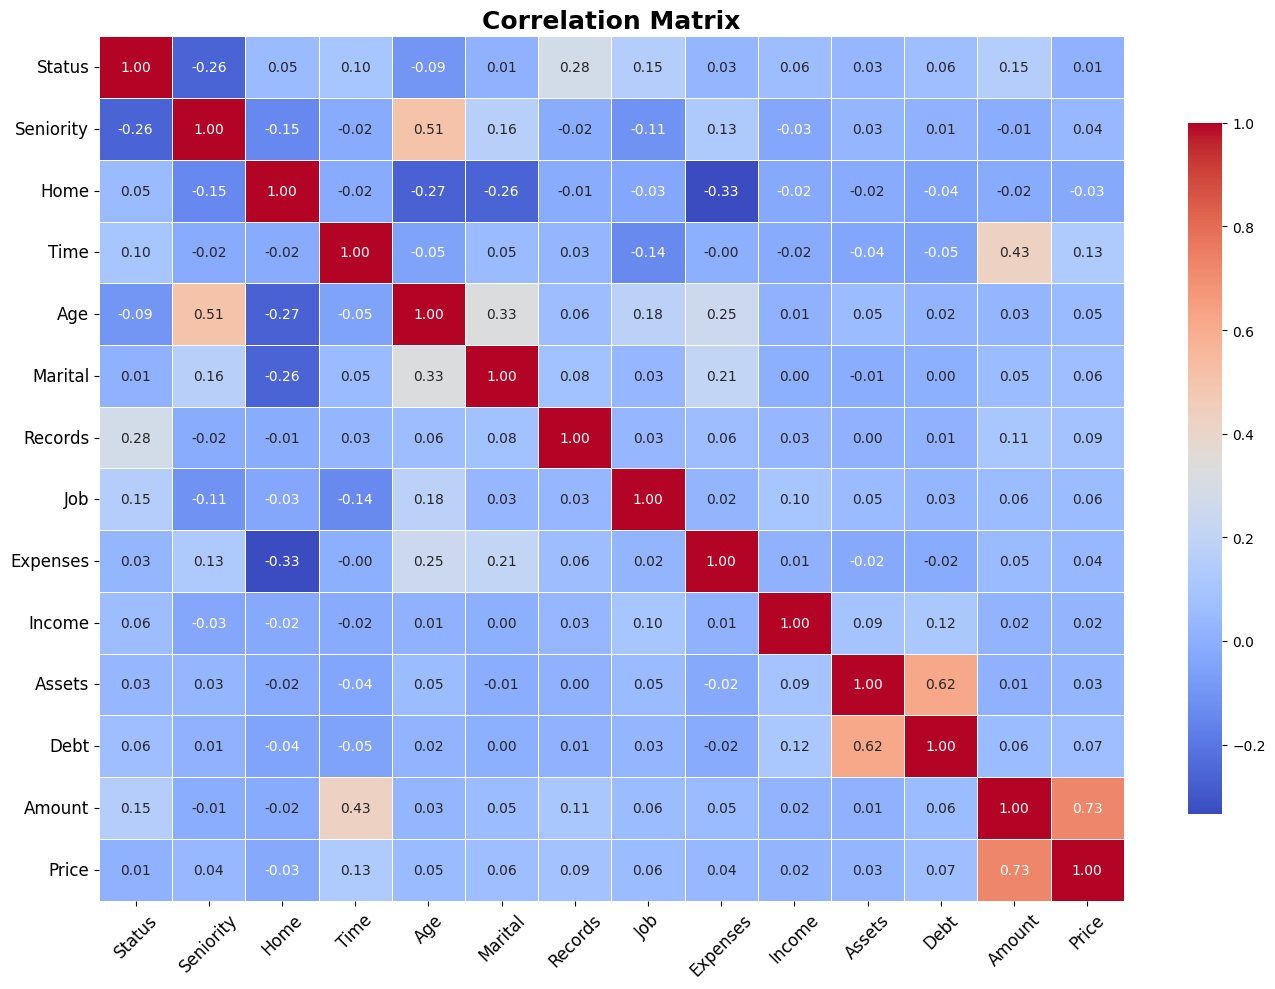

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n### Correlation of Numeric Columns ###")
numeric_cols = df.select_dtypes(include=['number'])

if not numeric_cols.empty:
    # Calculate the correlation matrix
    correlation = numeric_cols.corr()

    # Set the figure size for a wider and larger plot
    plt.figure(figsize=(14, 10))  # Adjust the width and height of the plot

    # Plot the heatmap with improved aesthetics
    sns.heatmap(
        correlation,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",  # Format annotations to 2 decimal places
        linewidths=0.5,  # Add thin lines between cells
        cbar_kws={"shrink": 0.8}  # Shrink the color bar for better fit
    )
    plt.title("Correlation Matrix", fontsize=18, fontweight='bold')  # Add a bold title
    plt.xticks(fontsize=12, rotation=45)  # Adjust font size and tilt for X-axis labels
    plt.yticks(fontsize=12, rotation=0)  # Adjust font size for Y-axis labels
    plt.tight_layout()  # Reduce extra margins
    plt.show()
else:
    print("No numeric columns found.")


### Общая информация ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB
None

### Размер датасета ###
Число строк: 4455, Число столбцов: 14

### Типы данных ###
Status       int64
Seniority    int64
Home         int64
Time         int64
Age          int64
Marital      int64
Records      int

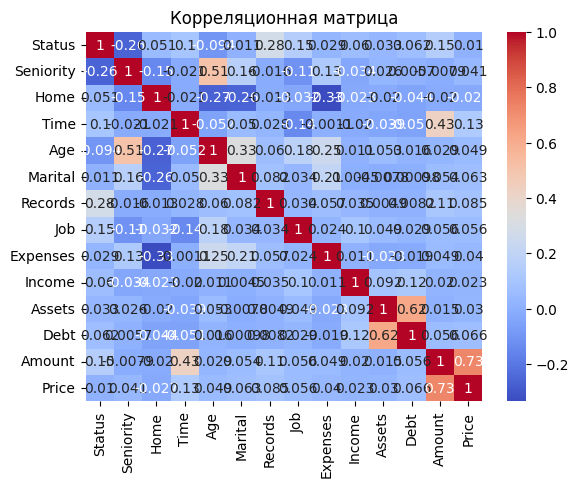


### Распределение числовых данных ###


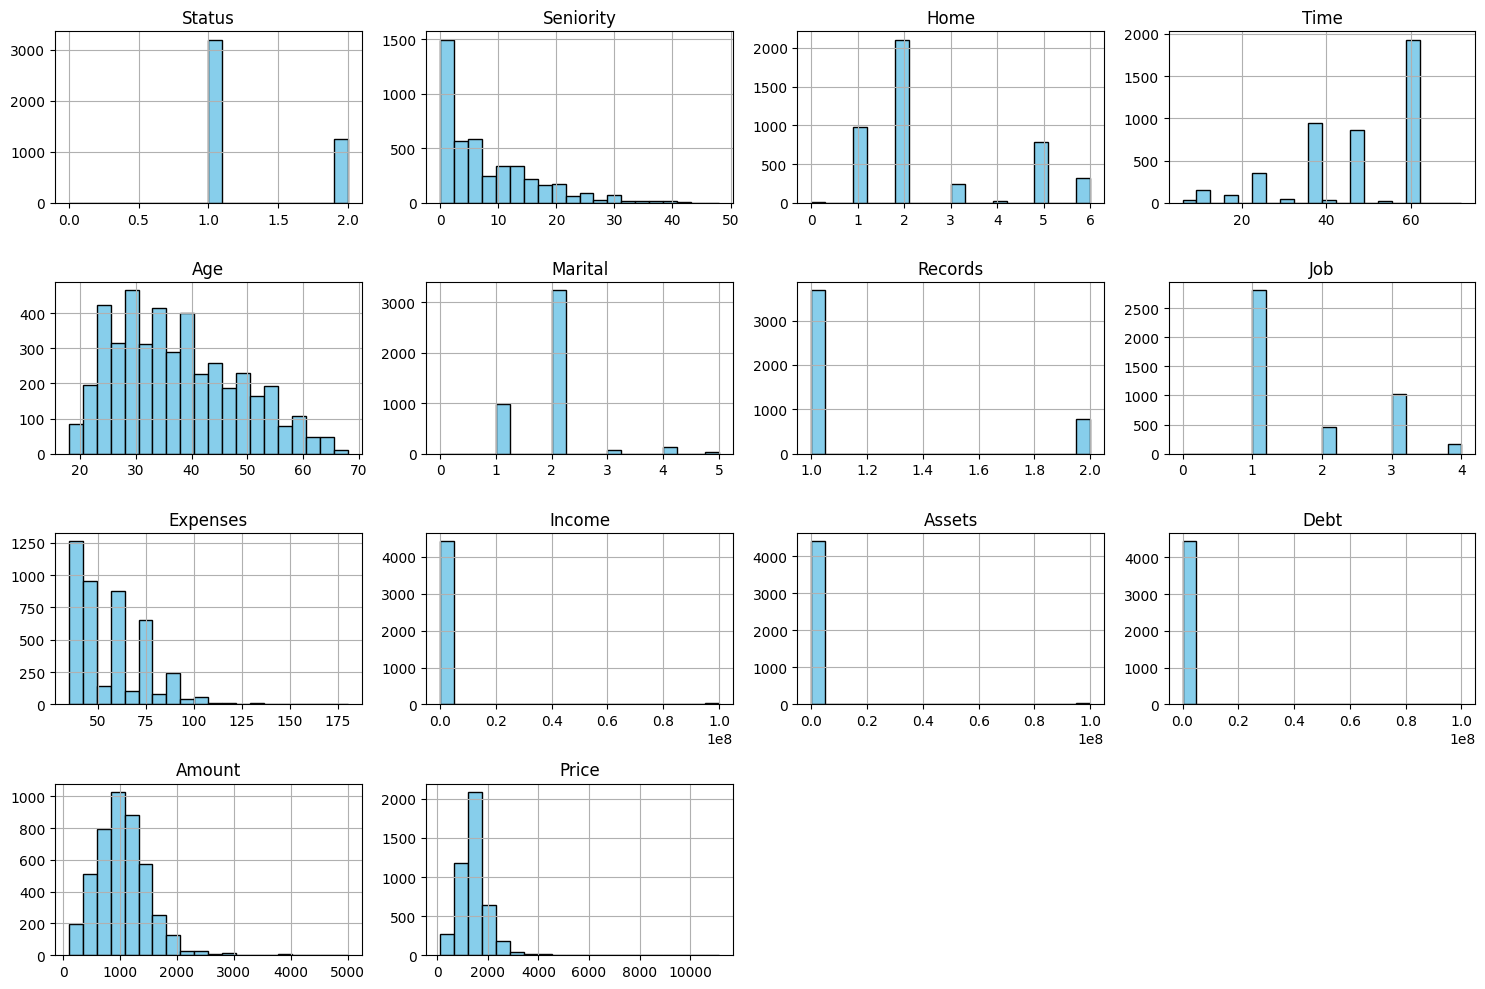


### Частота категориальных значений ###

### Завершение анализа ###
Анализ завершен, графики и данные выше.


In [5]:
full_dataset_overview(df)

- status — удалось ли клиенту погасить кредит (1) или нет (2);
- seniority — стаж работы в годах;
- home — тип домовладения: аренда (1), владение (2) и другие;
- time — планируемый срок предоставления кредита (в месяцах);
- age — возраст клиента;
- marital [status] — холост (1), женат (2) и др.;
- records — есть ли у клиента какие-либо предыдущие записи: нет (1), да (2)(из описания набора данных неясно, о каких записях здесь идет речь. Учитывая суть проекта‚ можно предположить, что речь о записях в базе данных
банка);
- job — тип работы: полный рабочий день (1), неполный рабочий день (2)
и другие;
- expenses — сколько клиент тратит в месяц;
- income — сколько клиент зарабатывает в месяц;
- assets — общая стоимость всех активов клиента;
- debt — сумма кредитной задолженности;
- amount — запрашиваемая сумма кредита;
- price — цена товара, который клиент хочет приобрести.

In [6]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.columns = df.columns.str.lower()

In [8]:
status_values = {
 1: 'ok',
 2: 'default',
 0: 'unknown'
}

In [9]:
df.status = df.status.map(status_values)

In [10]:
df.status.unique()

array(['ok', 'default', 'unknown'], dtype=object)

<Axes: >

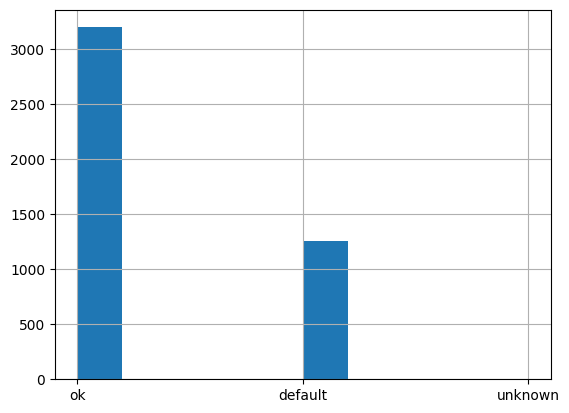

In [11]:
df.status.hist()

In [12]:
home_values = {
 1: 'rent',
 2: 'owner',
 3: 'private',
 4: 'ignore',
 5: 'parents',
 6: 'other',
 0: 'unk'
}

In [13]:
df.home = df.home.map(home_values)

In [14]:
marital_values = {
 1: 'single',
 2: 'married',
 3: 'widow',
 4: 'separated',
 5: 'divorced',
 0: 'unk'
}
df.marital = df.marital.map(marital_values)

In [15]:
records_values = {
 1: 'no',
 2: 'yes',
 0: 'unk'
}
df.records = df.records.map(records_values)

In [16]:
job_values = {
 1: 'fixed',
 2: 'parttime',
 3: 'freelance',
 4: 'others',
 0: 'unk'
}
df.job = df.job.map(job_values)

In [17]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [18]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [19]:
col = ['income', 'assets', 'debt']

In [20]:
for c in col:
 df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [21]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [22]:
df = df[df.status != 'unknown']

In [23]:
df.status.value_counts()

,count
status,
ok,3200
default,1254


<Axes: >

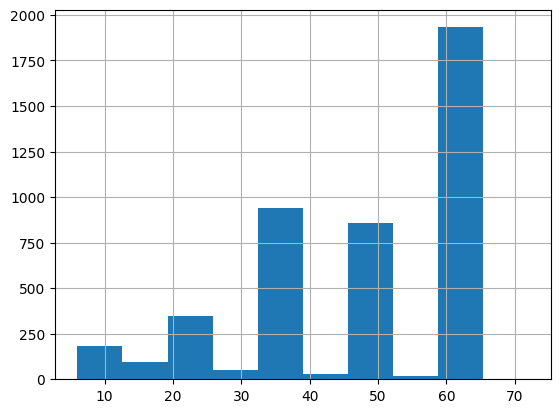

In [24]:
df.time.hist()

In [25]:
df.time.value_counts()

,count
time,
60,1932
36,942
48,860
24,350
12,148
18,93
30,49
6,33
42,29


<Axes: >

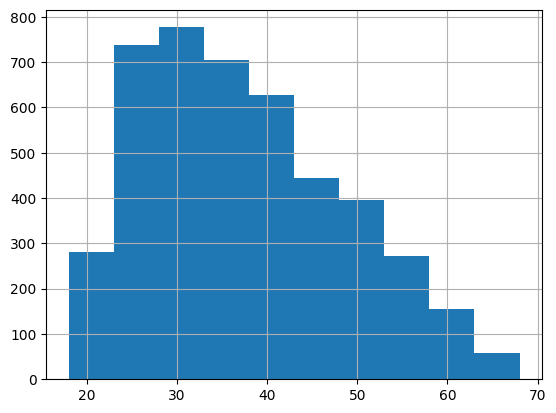

In [26]:
df.age.hist()

In [27]:
df.age.value_counts()

,count
age,
28,178
26,163
32,159
30,156
34,155
27,153
31,153
24,152
36,145


<Axes: >

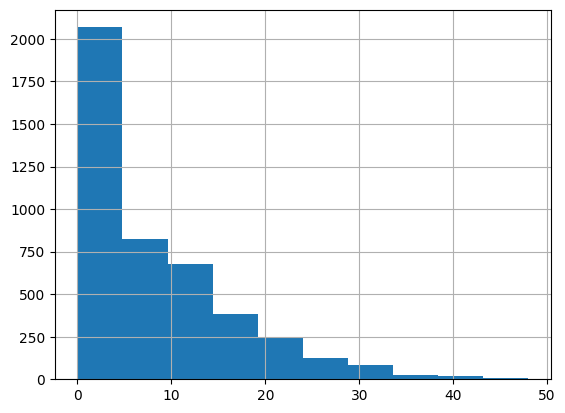

In [28]:
df.seniority.hist()

In [29]:
df.seniority.value_counts()

,count
seniority,
0,535
1,510
2,454
3,336
5,266
10,235
4,233
6,181
8,163


<Axes: >

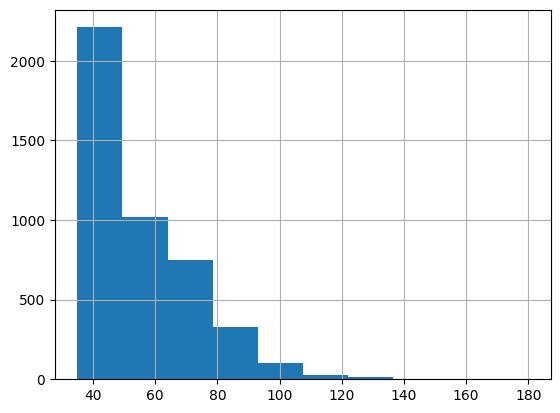

In [30]:
df.expenses.hist()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     4454 non-null   object 
 1   seniority  4454 non-null   int64  
 2   home       4454 non-null   object 
 3   time       4454 non-null   int64  
 4   age        4454 non-null   int64  
 5   marital    4454 non-null   object 
 6   records    4454 non-null   object 
 7   job        4454 non-null   object 
 8   expenses   4454 non-null   int64  
 9   income     4420 non-null   float64
 10  assets     4407 non-null   float64
 11  debt       4436 non-null   float64
 12  amount     4454 non-null   int64  
 13  price      4454 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 522.0+ KB


Теперь‚ когда наш набор данных очищен,мы практически готовы использовать его
для обучения модели. Но прежде необходимо предпринять еще несколько шагов:
 разделить набор данных на обучающие, проверочные и тестовые;
 обработать пропущенные значения;
 использовать прямое кодирование для категориальных переменных;
 создать матрицу признаков X и целевую переменную y.
Начнем с разделения данных. Мы разделим их на три части:
 обучающие (60 % от исходного набора);
 данные для проверки (20 %);
 тестовые (20 %).


[photo_2025-01-03_13-48-11.jpg](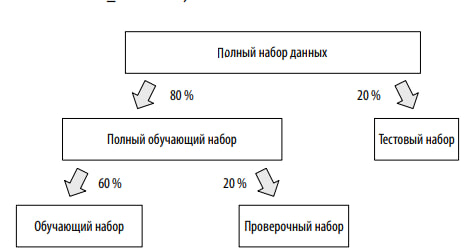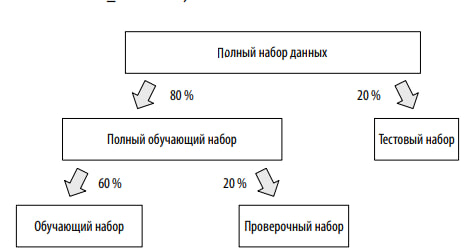))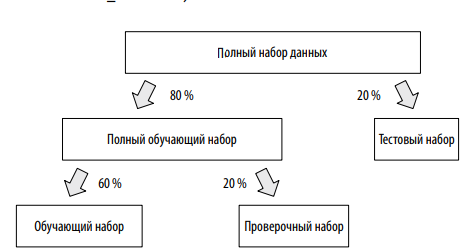

In [32]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [33]:
from sklearn.impute import SimpleImputer

# Заполнение пропущенных значений средним для числовых данных
numerical_imputer = SimpleImputer(strategy='mean')
df[['income', 'assets', 'debt']] = numerical_imputer.fit_transform(df[['income', 'assets', 'debt']])

# Проверка, все ли пропуски заполнены
print(df.isnull().sum())

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64


<ipython-input-33-8931991b07a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['income', 'assets', 'debt']] = numerical_imputer.fit_transform(df[['income', 'assets', 'debt']])


In [34]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [35]:
df.isna().sum()

,0
status,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,0


In [36]:
label_encoders = {}
for column in ['status', 'home', 'marital', 'records', 'job']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(['status'], axis=1)
y = df['status']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Разделим обучающую выборку на train и validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=11)


<ipython-input-36-9184ffbdb7a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-36-9184ffbdb7a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-36-9184ffbdb7a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [37]:
X_train.isnull().sum()

,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,0
assets,0


In [38]:
# Создание пустого списка для хранения результатов
results = []

# Функция для записи результатов
def record_result(trial, auc_score):
    model_type = trial.params['model_type']
    params = trial.params
    results.append({
        'Model': model_type,
        'AUC': auc_score,
        'Parameters': params
    })

# Модификация objective функции для записи результатов
def objective(trial):
    model_type = trial.suggest_categorical('model_type', ['GradientBoosting', 'RandomForest', 'LogisticRegression', 'NeuralNetwork'])

    if model_type == 'GradientBoosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
        model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

    elif model_type == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    elif model_type == 'LogisticRegression':
        C = trial.suggest_loguniform('C', 1e-5, 1e5)
        model = LogisticRegression(C=C)

    elif model_type == 'NeuralNetwork':
        hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (100, 50)])
        learning_rate_init = trial.suggest_float('learning_rate_init', 0.0001, 0.1)
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init)

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]  # Вероятности для класса 1
    auc_score = roc_auc_score(y_val, y_pred)

    # Записываем результат
    record_result(trial, auc_score)

    return auc_score


In [39]:
# Создаем объект исследования
study = optuna.create_study(direction='maximize')

# Запуск оптимизации
study.optimize(objective, n_trials=100)

# Выводим лучшие параметры
print(f"Best trial: {study.best_trial.params}")

[I 2025-01-07 21:34:26,071] A new study created in memory with name: no-name-3f999f6c-7100-476e-a66c-59058fd940ea
<ipython-input-38-12d8812f01b2>:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2025-01-07 21:34:26,331] Trial 0 finished with value: 0.7405397059891986 and paramet

Best trial: {'model_type': 'RandomForest', 'n_estimators': 110, 'max_depth': 9}


                 Model       AUC  \
0   LogisticRegression  0.740540   
1   LogisticRegression  0.743210   
2        NeuralNetwork  0.500000   
3        NeuralNetwork  0.735663   
4   LogisticRegression  0.742302   
..                 ...       ...   
95        RandomForest  0.825019   
96        RandomForest  0.822676   
97        RandomForest  0.819473   
98        RandomForest  0.826109   
99        RandomForest  0.826727   

                                           Parameters  
0   {'model_type': 'LogisticRegression', 'C': 0.77...  
1   {'model_type': 'LogisticRegression', 'C': 2.34...  
2   {'model_type': 'NeuralNetwork', 'hidden_layer_...  
3   {'model_type': 'NeuralNetwork', 'hidden_layer_...  
4   {'model_type': 'LogisticRegression', 'C': 0.00...  
..                                                ...  
95  {'model_type': 'RandomForest', 'n_estimators':...  
96  {'model_type': 'RandomForest', 'n_estimators':...  
97  {'model_type': 'RandomForest', 'n_estimators':...  
98  {'m

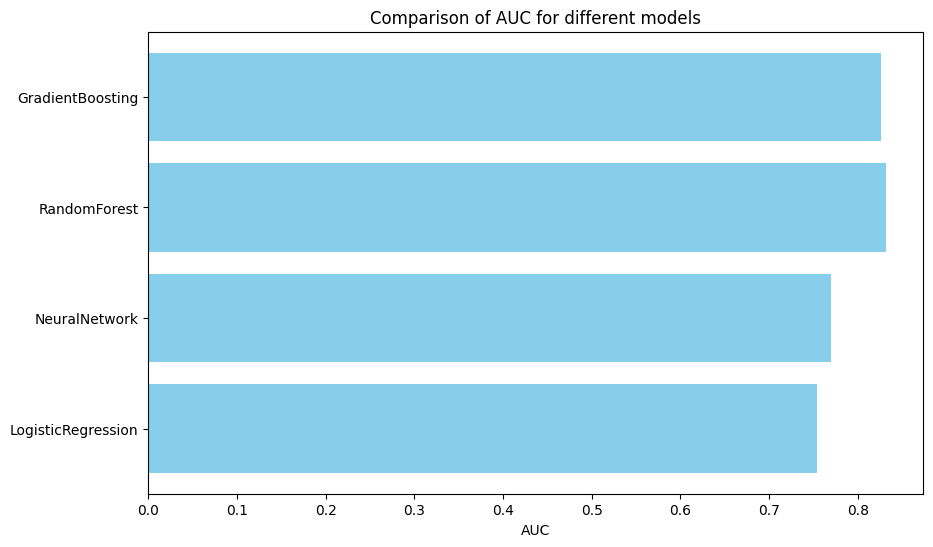

In [40]:
results_df = pd.DataFrame(results)

# Выводим таблицу с результатами
print(results_df)

# Строим график для сравнения AUC моделей
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['AUC'], color='skyblue')
plt.xlabel('AUC')
plt.title('Comparison of AUC for different models')
plt.show()

In [42]:
results_df.AUC.max()

0.8324725727156039